# 사전 학습 CNN

In [27]:
import keras
import os
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline

In [21]:
# Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


# Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')


# Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')

# Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [22]:
# Load the VGG model
vgg_model_2 = vgg16.VGG16(weights='imagenet', include_top=False)


# Load the Inception_V3 model
inception_model_2 = inception_v3.InceptionV3(
    weights='imagenet',  include_top=False)


# Load the ResNet50 model
resnet_model_2 = resnet50.ResNet50(weights='imagenet',  include_top=False)

# Load the MobileNet model
mobilenet_model_2 = mobilenet.MobileNet(weights='imagenet',  include_top=False)

In [3]:
vgg_model.summary()    # 138,357,544
# inception_model.summary() # 23,851,784
# resnet_model.summary()  # 25,636,712
# mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

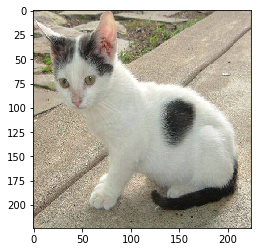

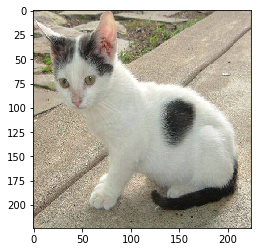

image batch size (1, 224, 224, 3)


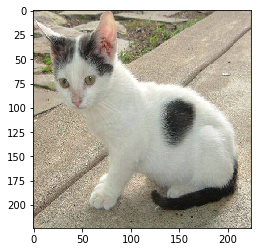

In [23]:
filename = './augmentation_img/cat.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))  # uunt8 = 256
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [24]:
processed_image = vgg16.preprocess_input(
    image_batch.copy())  # 전처리 과정서 변질될 수 있기에 copy() 사용
predictions = vgg_model.predict(processed_image)
label_vgg = decode_predictions(predictions, top=10)
print(label_vgg)
print(predictions.shape)
print(predictions)

[[('n02123597', 'Siamese_cat', 0.3093419), ('n01877812', 'wallaby', 0.080341235), ('n02326432', 'hare', 0.075098425), ('n02325366', 'wood_rabbit', 0.05053069), ('n03223299', 'doormat', 0.04817361), ('n02328150', 'Angora', 0.047498785), ('n02124075', 'Egyptian_cat', 0.043961022), ('n02108915', 'French_bulldog', 0.03665566), ('n02087046', 'toy_terrier', 0.015123252), ('n03793489', 'mouse', 0.011756639)]]
(1, 1000)
[[6.01666306e-06 1.32372470e-05 9.57593438e-05 6.77861754e-05
  2.45325617e-04 7.88017933e-05 1.48386780e-05 6.28511407e-05
  2.61551555e-04 5.89917090e-06 2.75581692e-06 7.29187150e-06
  8.97964355e-07 2.71784775e-05 1.95089319e-06 1.53718770e-06
  8.30566387e-06 1.63343662e-04 5.75680715e-05 2.25956810e-05
  2.15743717e-06 6.06207186e-06 2.20167507e-07 5.36907419e-06
  1.50729613e-06 2.45250067e-06 8.64703179e-06 2.21814435e-06
  6.42756504e-06 3.25336703e-04 1.44235025e-06 4.39506402e-06
  1.08465360e-06 2.74118815e-06 2.47697335e-05 5.96009113e-06
  1.10784813e-05 1.3925469

In [12]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet
print(label_resnet)
print(predictions.shape)
print(predictions)

[[('n02124075', 'Egyptian_cat', 0.17055027), ('n02123597', 'Siamese_cat', 0.12245734), ('n03958227', 'plastic_bag', 0.11745567)]]
(1, 1000)
[[1.39508047e-05 2.47386179e-05 5.19854302e-06 8.12075632e-06
  6.79790246e-05 5.18405432e-05 2.75454913e-05 9.95888768e-05
  3.72922106e-04 1.26586483e-05 3.47765058e-06 3.23664790e-05
  2.01056127e-06 8.83191115e-06 3.45774561e-06 1.31481820e-05
  1.17297095e-05 2.97554143e-05 1.25714199e-04 1.43482175e-05
  1.90969968e-06 1.56983915e-05 2.78375546e-06 2.99211406e-05
  1.55496650e-06 3.19358560e-06 3.63552090e-06 6.92103004e-06
  4.33932200e-06 2.46041982e-05 3.46225306e-06 5.60567105e-06
  1.79484903e-06 2.55149735e-05 2.55173818e-05 1.48672043e-05
  4.76223977e-05 5.53289465e-05 1.20467084e-05 1.84712935e-05
  5.12423730e-06 2.11062688e-05 1.89158200e-05 3.15109787e-06
  2.79398064e-05 1.86806155e-05 1.34039647e-05 2.83948566e-06
  5.22951132e-06 8.97862378e-07 2.25742815e-06 4.45171972e-05
  5.03084884e-05 7.15757460e-06 4.00916033e-05 1.16912

In [25]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet
print(label_mobilenet)
print(predictions.shape)
print(predictions)

[[('n03958227', 'plastic_bag', 0.15703666), ('n02124075', 'Egyptian_cat', 0.11697406), ('n02123597', 'Siamese_cat', 0.10532712), ('n02123045', 'tabby', 0.07564862), ('n02909870', 'bucket', 0.05468159)]]
(1, 1000)
[[2.17454199e-05 1.72106575e-05 5.67833649e-06 1.95314419e-06
  8.29890414e-05 2.16929227e-04 6.68648354e-05 3.80205420e-05
  4.44492238e-04 6.70318914e-05 2.27425190e-07 3.50110849e-06
  8.62919762e-08 2.51816459e-07 3.38033971e-07 2.26712515e-07
  4.84403745e-06 1.25278520e-05 3.57978824e-05 1.34451284e-05
  1.24283915e-07 2.78331004e-06 4.30782336e-07 2.27900135e-04
  4.35898500e-07 2.68212432e-07 1.47123740e-06 3.78092113e-06
  5.82841778e-07 1.11650843e-05 1.47691253e-06 6.57464341e-07
  1.74060176e-06 2.12529835e-06 6.46908165e-06 1.49327207e-06
  2.32345428e-06 3.19136666e-06 4.75703655e-06 1.11959844e-05
  5.93542882e-06 2.64989121e-05 2.39733686e-06 1.36544406e-06
  1.88755757e-06 6.01153715e-06 7.07706840e-06 3.82486587e-06
  1.48212621e-06 2.65630490e-07 2.48279378e

In [15]:
filename = './augmentation_img/cat.jpg'
original = load_img(filename, target_size=(299, 299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception
print(label_inception)
print(predictions.shape)
print(predictions)

[[('n02124075', 'Egyptian_cat', 0.66225785), ('n02123045', 'tabby', 0.050285194), ('n02123597', 'Siamese_cat', 0.036381446), ('n02123159', 'tiger_cat', 0.023522446), ('n03223299', 'doormat', 0.015205682)]]
(1, 1000)
[[1.32744099e-04 1.17733027e-04 4.51648557e-05 9.14812990e-05
  8.69606229e-05 6.92934409e-05 8.24476156e-05 3.23344939e-05
  1.82606382e-04 2.28416175e-05 1.86823327e-05 1.00537916e-04
  7.02853795e-05 4.23477286e-05 4.15884570e-05 6.55361728e-05
  8.09025223e-05 1.35603084e-04 1.96584428e-04 6.58233621e-05
  1.96190267e-05 6.07469810e-05 1.70558433e-05 9.36929646e-05
  1.66197224e-05 6.93594266e-05 7.33891211e-05 7.60420735e-05
  6.29523493e-05 6.73226532e-05 9.04042172e-05 1.48048479e-04
  4.72281572e-05 1.69523828e-05 5.33679995e-05 5.71602468e-05
  1.06079286e-04 7.73009378e-05 1.70949672e-04 3.86199790e-05
  5.06917131e-05 9.44259227e-05 1.17229858e-04 7.49336468e-05
  6.65352127e-05 1.09558765e-04 1.41331097e-04 9.05773268e-05
  5.67915195e-05 2.85126480e-05 2.686364

In [26]:
import cv2
img = cv2.imread("./augmentation_img/cat.jpg")
img = cv2.resize(img, (1000, 1000))
cv2.putText(img, "VGG16: {}, {:.2f}".format(
    label_vgg[0][0][1], label_vgg[0][0][2]), (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "MobileNet: {}, {:.2f}".format(
    label_mobilenet[0][0][1], label_mobilenet[0][0][2]), (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(
    label_inception[0][0][1], label_inception[0][0][2]), (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(
    label_resnet[0][0][1], label_resnet[0][0][2]), (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("out.jpg", img)

True

# extra practice

In [52]:
image_DIR = './actress'
image_folder_list = np.array(os.listdir(image_DIR))
i = 0
for index in range(len(image_folder_list)):
    path = os.path.join(image_DIR, image_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    
    for img in img_list:
        img_path = os.path.join(path, img)
        original = load_img(img_path, target_size=(224, 224))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)

        decode_vgg = decode_predictions(vgg_model.predict(
            vgg16.preprocess_input(image_batch.copy())), top=3)
        
        decode_resnet = decode_predictions(resnet_model.predict(
            resnet50.preprocess_input(image_batch.copy())), top=3)
        
        decode_mobilenet = decode_predictions(mobilenet_model.predict(
            mobilenet.preprocess_input(image_batch.copy())), top=3)

        img = cv2.imread(img_path)
        img = cv2.resize(img, (1000, 1000))
        
        cv2.putText(img, "VGG16: {}, {:.2f}".format(
            label_vgg[0][0][1], label_vgg[0][0][2]), (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
        cv2.putText(img, "MobileNet: {}, {:.2f}".format(
            label_mobilenet[0][0][1], label_mobilenet[0][0][2]), (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
        cv2.putText(img, "ResNet50: {}, {:.2f}".format(
            label_resnet[0][0][1], label_resnet[0][0][2]), (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
        cv2.imwrite(f"out{i}.jpg", img)
        i += 1

# Transfer Learning

* create the model
* VGG 16

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

In [54]:
train_dir = './clean-dataset/train'
validation_dir = './clean-dataset/validation'
image_size = 224

## Freezing all layers

In [56]:
from keras import optimizers
from keras import layers
from keras import models
from keras.applications import VGG16

# Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False,
                 input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x00000220F55F4208> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55863C8> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55F4C08> False
<keras.layers.pooling.MaxPooling2D object at 0x00000220F55A3148> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55AAC88> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55B4C08> False
<keras.layers.pooling.MaxPooling2D object at 0x00000220F55C8A88> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55D8CC8> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55E0B08> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55C2DC8> False
<keras.layers.pooling.MaxPooling2D object at 0x00000220F55D5988> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55E3D48> False
<keras.layers.convolutional.Conv2D object at 0x00000220F55EA988> False
<keras.layers.convolutional.Conv2D object at 0x00000220F5CDAAC8> False
<ker

## Experiment 1
train the model

In [57]:
# No Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=train_batchsize,
    class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_size, image_size),
    batch_size=val_batchsize,
    class_mode='categorical',
    shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [58]:
# Train the Model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    verbose=1)

Epoch 1/5
6/6 [==============================] - 259s 43s/step - loss: 10.2899 - accuracy: 0.3700 - val_loss: 2.5758 - val_accuracy: 0.5800
Epoch 2/5
6/6 [==============================] - 253s 42s/step - loss: 3.3354 - accuracy: 0.6000 - val_loss: 0.0558 - val_accuracy: 0.8733
Epoch 3/5
6/6 [==============================] - 255s 43s/step - loss: 1.1139 - accuracy: 0.7717 - val_loss: 0.1818 - val_accuracy: 0.8867
Epoch 4/5
6/6 [==============================] - 252s 42s/step - loss: 0.5216 - accuracy: 0.8600 - val_loss: 0.1893 - val_accuracy: 0.8667
Epoch 5/5
6/6 [==============================] - 252s 42s/step - loss: 0.2367 - accuracy: 0.9250 - val_loss: 0.0084 - val_accuracy: 0.8333


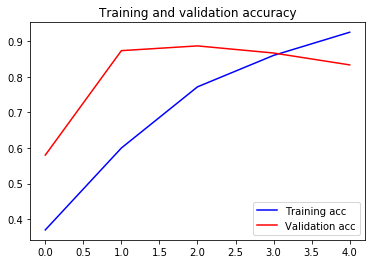

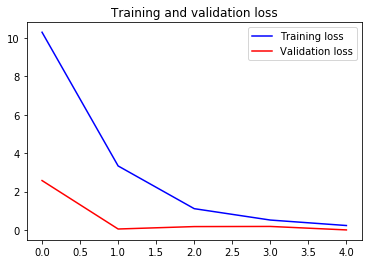

In [59]:
# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 모델 학습 반복

In [60]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    verbose=1)

Epoch 1/10
6/6 [==============================] - 265s 44s/step - loss: 0.1548 - accuracy: 0.9533 - val_loss: 0.0484 - val_accuracy: 0.9200
Epoch 2/10
6/6 [==============================] - 265s 44s/step - loss: 0.0995 - accuracy: 0.9683 - val_loss: 0.1593 - val_accuracy: 0.8933
Epoch 3/10
6/6 [==============================] - 264s 44s/step - loss: 0.0659 - accuracy: 0.9750 - val_loss: 0.0474 - val_accuracy: 0.9133
Epoch 4/10
6/6 [==============================] - 262s 44s/step - loss: 0.0402 - accuracy: 0.9833 - val_loss: 0.0129 - val_accuracy: 0.8667
Epoch 5/10
6/6 [==============================] - 264s 44s/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0286 - val_accuracy: 0.8933
Epoch 6/10
6/6 [==============================] - 261s 43s/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 0.9067
Epoch 7/10
6/6 [==============================] - 260s 43s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9067
Epoch 8/10
6/6 [====

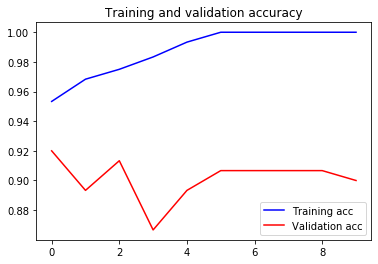

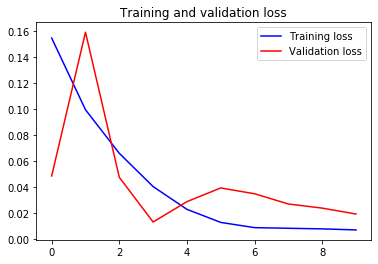

In [61]:
# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    verbose=1)

Epoch 1/10
6/6 [==============================] - 261s 43s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9067
Epoch 2/10
6/6 [==============================] - 260s 43s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9067
Epoch 3/10
1/6 [====>.........................] - ETA: 2:51 - loss: 0.0021 - accuracy: 1.0000